In [1]:
"""Sample of non-hierarchical clustering by Silhouette analysis.
"""
%matplotlib inline
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from sklearn.datasets import make_blobs
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples


# Sample data creation.
X, y = make_blobs(
    n_samples=150,
    n_features=2,
    centers=3,
    cluster_std=0.5,
    shuffle=True,
    random_state=0
)

# Data Standardization.
sc = preprocessing.StandardScaler()
X_norm = sc.fit_transform(X)
x_axis = X_norm[:,0]
y_axis = X_norm[:,1]


def kmeans_clustering_and_fit(cluster_num: int):
    km = KMeans(
        n_clusters=cluster_num,
        n_init=10,
        max_iter=300,
        random_state=0
    )
    return km.fit(X_norm)


z_km = kmeans_clustering_and_fit(3)

cluster_labels = np.unique(z_km.labels_)
n_cluster: int = cluster_labels.shape[0]

silhoette_values = silhouette_samples(
    X,
    z_km.labels_
)
display(silhoette_values)

array([0.75956181, 0.43233677, 0.7747553 , 0.72286402, 0.76729229,
       0.72280273, 0.69484791, 0.76101499, 0.77303671, 0.67320272,
       0.62375802, 0.40348569, 0.80092777, 0.73225118, 0.59884632,
       0.78954087, 0.75955598, 0.81572606, 0.79897477, 0.7936958 ,
       0.72221435, 0.76384238, 0.72671597, 0.73219594, 0.74183186,
       0.81463826, 0.76045682, 0.62065362, 0.57912988, 0.76929277,
       0.707709  , 0.8045906 , 0.7116979 , 0.78561661, 0.66997314,
       0.65285806, 0.68519649, 0.77015391, 0.72638012, 0.77905009,
       0.56028722, 0.70806176, 0.66201873, 0.77669657, 0.79206045,
       0.79499104, 0.67874476, 0.43073904, 0.72878986, 0.75911278,
       0.61479508, 0.68506268, 0.76602547, 0.80521304, 0.79571018,
       0.77872478, 0.63708395, 0.62515462, 0.58878683, 0.7767243 ,
       0.72889549, 0.40154174, 0.80287718, 0.78189854, 0.76687374,
       0.35466307, 0.79135592, 0.56967556, 0.37334246, 0.54630918,
       0.61918571, 0.70584253, 0.79635805, 0.61369253, 0.74071

50
50
50


([<matplotlib.axis.YTick at 0x7fb0f63a9150>,
 [Text(0, 25.0, '1'), Text(0, 75.0, '2'), Text(0, 125.0, '3')])

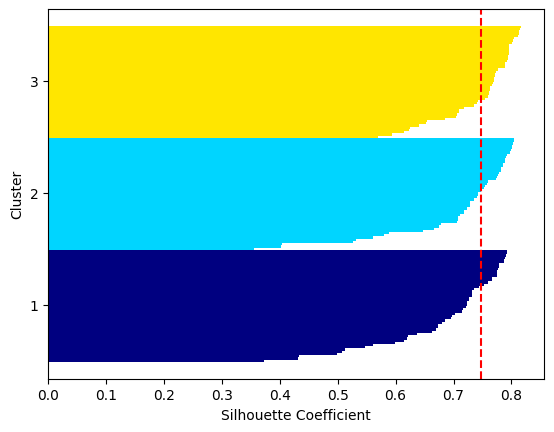

In [2]:
y_axis_lower, y_axis_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_values = silhoette_values[z_km.labels_==c]
    print(
        len(c_silhouette_values)
    )
    
    c_silhouette_values.sort()
    y_axis_upper += len(c_silhouette_values)
    color = cm.jet(float(i) / n_cluster)
    plt.barh(
        # Horizontal bar graph
        range(y_axis_lower, y_axis_upper),
        c_silhouette_values,
        height=1.0,
        edgecolor='none',
        color=color
    )
    yticks.append((y_axis_lower + y_axis_upper)/2.)
    y_axis_lower += len(c_silhouette_values)


silhouette_avg = np.mean(c_silhouette_values)

plt.axvline(
    silhouette_avg,
    color='red',
    linestyle='--'
)
# The closer the silhouette coefficient is to 1, the farther away from the other clusters.(-1 ~ 1)
plt.xlabel('Silhouette Coefficient')
# The thickness of the silhouette represents the number of samples belonging to the cluster(= cluster size).
plt.ylabel('Cluster')
plt.yticks(
    yticks,
    cluster_labels + 1
)

<function matplotlib.pyplot.show(close=None, block=None)>

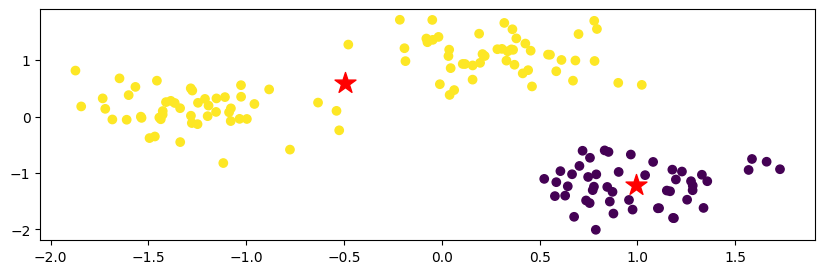

In [3]:
"""Control experiment
Try in case cluster number 2 as a case that does not work well.
"""
z_km = kmeans_clustering_and_fit(2)

plt.figure(figsize=(10, 3))
plt.scatter(
    # plot each cluster
    x_axis,
    y_axis,
    c=z_km.labels_
)
plt.scatter(
    # plot each cluster center
    z_km.cluster_centers_[:,0],
    z_km.cluster_centers_[:,1],
    s=250,
    marker='*',
    c='red'
)
plt.show